# Title: "Linear Regression Analysis on Life Expectancy"

## Data Set Source
The data set used in this analysis is the "Life Expectancy Data" data set found on Kaggle from compiled by the World Health Oraganization (WHO) by Deeksha Russell and Duan Wang (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). This data set contains information about various attributes that contribute to the status of health, such as the number of Alcohol intake, Hepatitis B, Measels, adult mortality rates, etc., along with their corresponding country, country status and life expentancy.

## Why the Data Set is Appropriate for Linear Regression
The "Life Expectancy" data set is appropriate for linear regression analysis because it involves predicting a continuous numerical value (i.e., life expectancy) based on the values of multiple input features (i.e., Alcohol intake, Hepatitis B). Linear regression is a suitable supervised learning algorithm for predicting numerical values based on input features, making it suitable for this data set.

## Analysis to be Performed and Questions to be Answered
The analysis will involve performing linear regression on the "Life Expectancy" data set to predict the Life expectancy of individuals based on their attributes. The main question this analysis will answer is: "Can we accurately predict the life expectancy of individuals based on their medical and geographical attributes, using linear regression?"

To verify the results of the analysis, I will split the data into training and testing sets. I will use the training set to train the linear regression model and the testing set to evaluate its performance. I will also use evaluation metrics such as mean squared error (MSE) and R-squared to assess the accuracy of the model's predictions.

Before fitting the data, I will need to extract relevant features from the data set. This may involve handling missing values, converting categorical variables into numerical representations, and selecting the most important features based on domain knowledge or feature selection techniques.

To fit the data, we will use popular machine learning libraries such as NumPy, Pandas, and scikit-learn in Python. We will import necessary functions from these libraries, such as LinearRegression from scikit-learn, to train the linear regression model and make predictions.

To visualize the data, I will use graphical plots such as scatter plots, histograms, and regression plots to explore the relationships between the input features and the target variable (i.e., fuel efficiency). These visualizations will help me gain insights into the data and interpret the results of our linear regression analysis.

In [38]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')




In [39]:
# Load the dataset
df = pd.read_csv('Life Expectancy Data.csv')

In [40]:
 # Print the first few rows of the dataset
print(df.head()) 

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [41]:
df.info() # Print information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Cleaning the Data
 To clean the data I will group by country as to ensure the data stays consistent. So if I make use of fillna() to use mean, median or mode, or interpolate() the data to the nearest values, the data will not be inconsistent.

In [42]:
# Group by 'Country'
df_grouped = df.groupby('Country')

# Apply backward fill within each group
df_filled = df_grouped.bfill()

# Replace original DataFrame with filled values
df.update(df_filled)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2921 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [43]:
# Remove whitespaces from column name
df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)

# Check the updated column names
print(df.columns)

# Remove rows with null values in "Life expectancy" column
df.dropna(subset=["Life expectancy"], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)



Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2912 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [45]:
# Group the DataFrame by "Country"
grouped = df.groupby("Country")

# Fill missing values in columns with mean of non-null values per country
df["Adult Mortality"] = grouped["Adult Mortality"].apply(lambda x: x.fillna(x.mean()))
df["Alcohol"] = grouped["Alcohol"].apply(lambda x: x.fillna(x.mean()))
df["Hepatitis B"] = grouped["Hepatitis B"].apply(lambda x: x.fillna(x.mean()))
df["Polio"] = grouped["Polio"].apply(lambda x: x.fillna(x.mean()))
df["Total expenditure"] = grouped["Total expenditure"].apply(lambda x: x.fillna(x.mean()))
df["Schooling"] = grouped["Schooling"].apply(lambda x: x.fillna(x.mean()))
df["Income composition of resources"]   = grouped["Income composition of resources"].apply(lambda x: x.fillna(x.mean()))
df["Diphtheria"]= grouped["Diphtheria"].apply(lambda x: x.fillna(x.mean()))
df["GDP"]= grouped["GDP"].apply(lambda x: x.fillna(x.mean()))
df["thinness  1-19 years"] = grouped["thinness  1-19 years"].apply(lambda x: x.fillna(x.mean()))
df["thinness 5-9 years"] = grouped["thinness 5-9 years"].apply(lambda x: x.fillna(x.mean()))

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2912 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2784 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [47]:
# Remove whitespaces from column name
df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)

# Check the updated column names
print(df.columns)

# Remove rows with null values in "Life expectancy" column
df.dropna(subset=["Hepatitis B"], inplace=True)

# Remove rows with null values in "Alcohol" column
df.dropna(subset=["Alcohol"], inplace=True)
#Remove rows with null values in "BMI" column
df.dropna(subset=["BMI"], inplace=True)
#Remove rows with null values in "GDP" column
df.dropna(subset=["Population"], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)
df.info()

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2128 non-null   object 
 1   Year                             2128 non-null   int64  
 2   Status                           2128 non-null   object 
 3   Life expectancy                  2128 non-null   float64
 4   Adult Mortality                  2128 non-null   float64
 5   infant deaths                    2128 non-null   i

### Cleaning Completed, since there are no more null values in the data

In [48]:
#Selecting dependent variable (target) and independent variable(s) (features)
# Independent variables
#Drop life expectancy as it is the dependent variable as well as country as it is not necessary for linear regression
X = df.drop(['Life expectancy','Country'], axis=1) 
# Dependent variable
y = df['Life expectancy']  


In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Convert "developed" to 1 and "developing" to 0 in both X_train and X_test
mapping = {"Developing": 0, "Developed": 1}
X_train["Status"] = X_train["Status"].map(mapping)
X_test["Status"] = X_test["Status"].map(mapping)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [52]:

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


In [53]:
# Calculate R-squared score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [54]:
# Calculate Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [55]:
# Evaluate the model
# Print accuracy metrics
print("Mean Squared Error (MSE) on training set:", mse_train)
print("Mean Squared Error (MSE) on test set:", mse_test)
print("Root Mean Squared Error (RMSE) on training set:", rmse_train)
print("Root Mean Squared Error (RMSE) on test set:", rmse_test)
print("R-squared score on training set:", r2_train)
print("R-squared score on test set:", r2_test)

Mean Squared Error (MSE) on training set: 15.08870627634539
Mean Squared Error (MSE) on test set: 15.001064279564476
Root Mean Squared Error (RMSE) on training set: 3.8844183961495946
Root Mean Squared Error (RMSE) on test set: 3.8731207416713045
R-squared score on training set: 0.833583979393657
R-squared score on test set: 0.8474139447938478


# Results
The test and taining data are quite similar suggesting that the data generalises well
## Mean Squared Error(MSE) and Root Squared Error(RMSE):
The MSE and RMSE are average sqared erros between predicted values and actual values of life expectancy (dependent variable). RMSE and MSE is relatively low and indicates a good fit for the data.
## R-Squared (R2)
The score of how well the model explains variability in the live expectancy variable. Ranging from 0 to 1, 1 indicates a perfect match. In this case the model has a 0.84 R2, meaning the model is statistically high and the variability in the life expectancy based on independant variables is a good match.



Just for some Illustration of the data of average live expectancy of each country

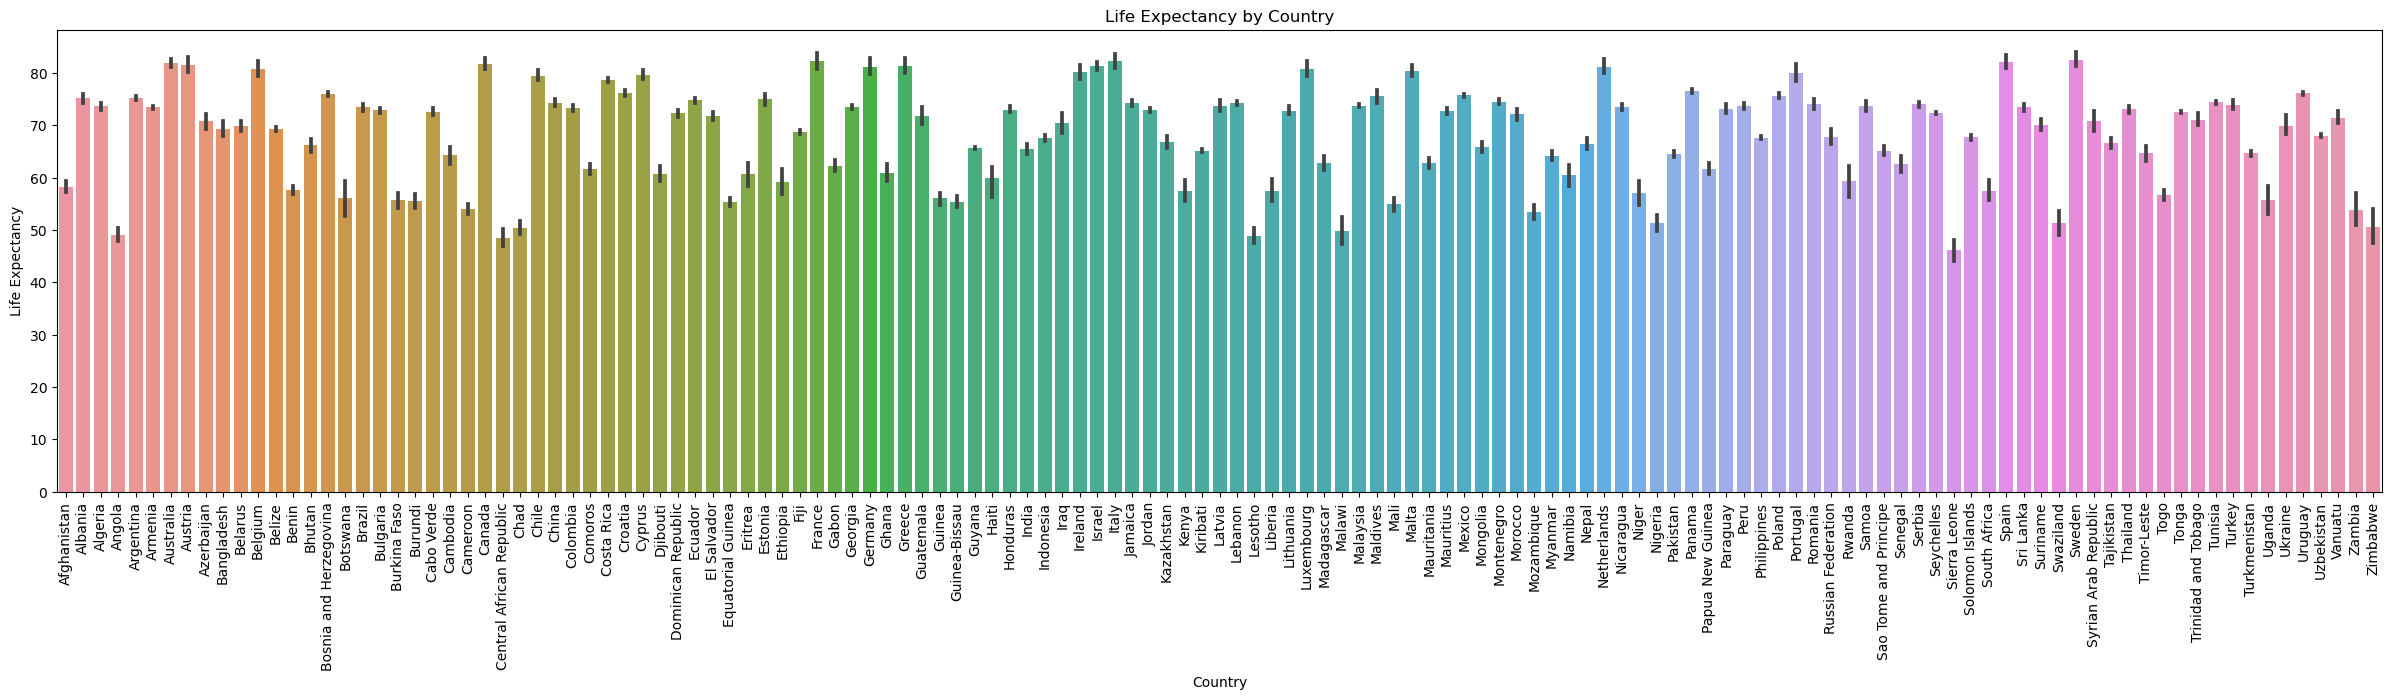

In [56]:
# Create a bar graph of life expectancy for each country
plt.figure(figsize=(30, 6))
sns.barplot(x='Country', y='Life expectancy', data=df)
plt.title('Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=90)
plt.show()



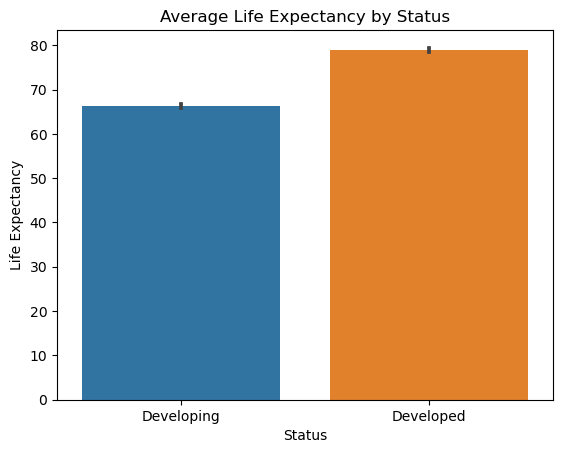

In [57]:
# Create a bar chart for 'Life expectancy' by 'Status'
sns.barplot(x='Status', y='Life expectancy', data=df)
plt.title('Average Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()

# Status vs Life Expectancy Results:
We can see that the Life Expectancy increases if the country is a developed country, which is what the hypothesis is.

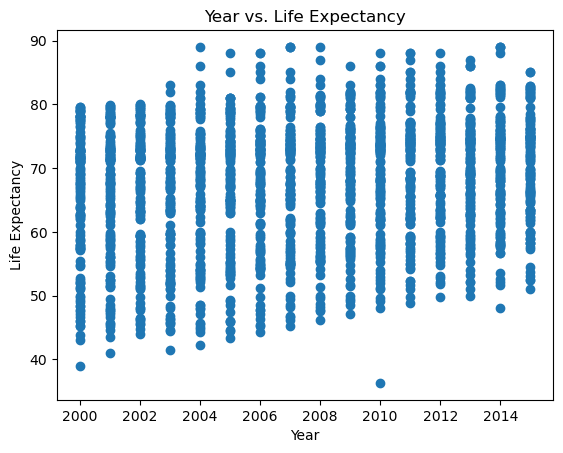

In [58]:
year = df['Year']
life_expectancy = df['Life expectancy']

# Create a scatter plot
plt.scatter(year, life_expectancy)
plt.title('Year vs. Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# Year vs Life Expectancy

As assumed, Life expectancy and the year in which the data was collected does not seem to have a correlation. So lets test what would happen if it is dropped from the data.

In [59]:
# Convert "developed" to 1 and "developing" to 0 in the original DataFrame
mapping = {"Developing": 0, "Developed": 1}
df["Status"] = df["Status"].map(mapping)

# Drop the 'Year' and 'Country' columns 
df_temp = df.drop(['Year', 'Country'], axis=1)

# Split the data into training and testing sets
X = df_temp.drop('Life expectancy', axis=1)
y = df_temp['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 15.22215107962291
Root Mean Squared Error (RMSE): 3.9015575197122123
R-squared (R2) Score: 0.8451651201737824


## Previous evaluations:
Mean Squared Error (MSE) : 15.088706276345382
Root Mean Squared Error (RMSE): 3.8844183961495937
R-squared : 0.833583979393657

It is clear that the year had no significant impact on the dataframe.

In [60]:

# Drop the 'Year'  column on real df
df.drop('Year', axis=1, inplace=True)


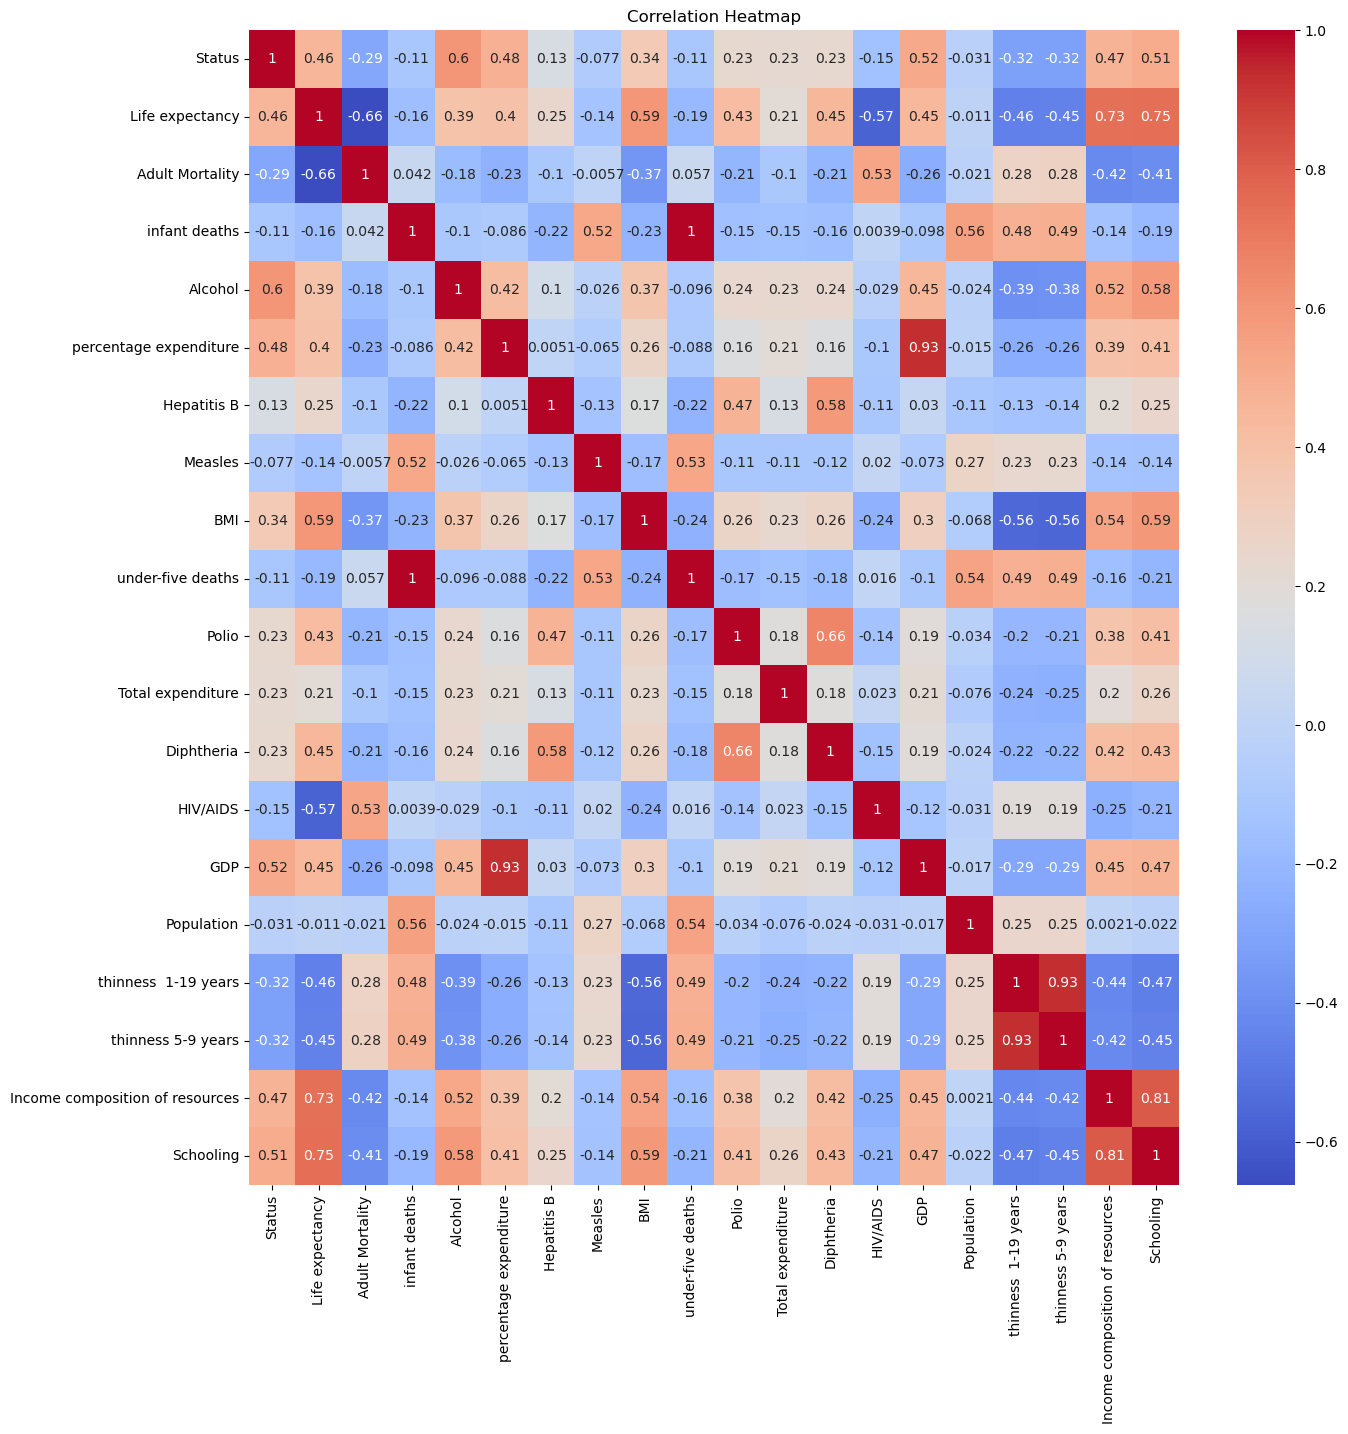

In [61]:


# Create correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(15, 15))  #

# Plot correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Show the plot
plt.show()



## Heatmap results:
Darker colours of the heatmap means high correlations, so when looking at this heatmap we can see that population has an extremely low correlation to Life expectancy. So lets remove that 

In [62]:
# Convert "developed" to 1 and "developing" to 0 in the original DataFrame
#mapping = {"Developing": 0, "Developed": 1}
#df["Status"] = df["Status"].map(mapping)

# Drop the 'population' columns on real df
df.drop(['Population'], axis=1, inplace=True)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 15.22215107962291
Root Mean Squared Error (RMSE): 3.9015575197122123
R-squared (R2) Score: 0.8451651201737824


## Previous evaluations:
Mean Squared Error (MSE) : 15.088706276345382
Root Mean Squared Error (RMSE): 3.8844183961495937
R-squared : 0.833583979393657

It is clear that the population had no significant impact on the dataframe.

# HeatMap Results

The heat mat results showed that the highest correlations with Life expectancy were Schooling and Income composition of resources.

To make the rest of the Linear regression less complicated, I will continue using these two with the highest correlation to life expectancy moving forward

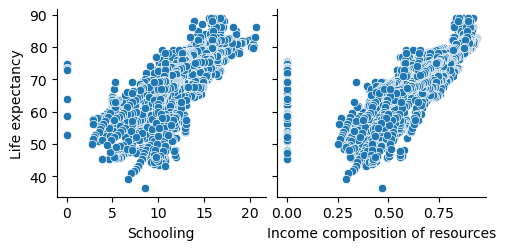

In [63]:
#Pair Plot

sns.pairplot(df, x_vars= ['Schooling', 'Income composition of resources'], y_vars= 'Life expectancy')

It is clear that both these x- values fit into linear regression. However there are some outliers in the regression.

In [64]:
# Define x and y
x = df[['Schooling', 'Income composition of resources']]
y = df['Life expectancy']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 15.22215107962291
Root Mean Squared Error (RMSE): 3.9015575197122123
R-squared (R2) Score: 0.8451651201737824


## Previous evaluations:
Mean Squared Error (MSE) : 15.088706276345382
Root Mean Squared Error (RMSE): 3.8844183961495937
R-squared : 0.833583979393657

The R2 score increased ,meaning the model is statistically higher that before and the independant variables are a good match, The MSE and RMSE decreased meaning the average squared errors also decreased, this is a good sign.


Creating a boxplot to see outliers

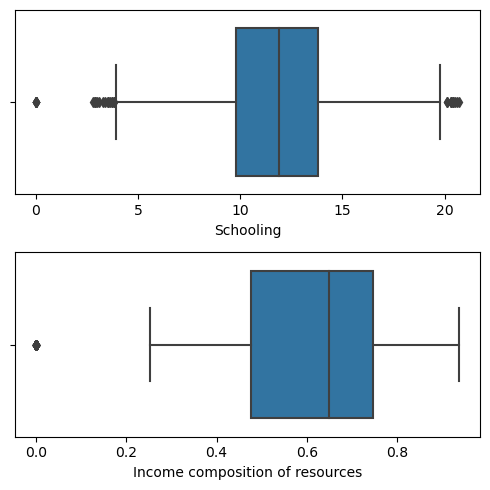

In [66]:
# Create a boxplot for Schooling and Life Expectancy

fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['Schooling'], ax = axs[0])
plt2 = sns.boxplot(df['Income composition of resources'], ax = axs[1])
plt.tight_layout()

It is clear there are some outliers as represented by the dots in the boxplot

In [67]:
new_df = df[['Life expectancy', 'Schooling', 'Income composition of resources']]

# Removing the outliers


We can determine which data points in a dataset are more than a certain amount away from the mean by computing the z-score for each one of the data points in the dataset. Typically, this threshold is set to be 2 or 3 standard deviations or more from the mean.
Using z-scores, we can find data points that deviate too much from the mean to be classified as typical or "normal" data in the context of eliminating outliers. These outliers can be removed by filtering out the data points whose z-scores exceed a certain threshold.


In [74]:
# Calculate z-scores
z_scores = np.abs((new_df - np.mean(new_df)) / np.std(new_df))

# Define threshold
threshold = 2.3

# Filter outliers
filtered_data = new_df[z_scores < threshold]
print(filtered_data)


      Life expectancy  Schooling  Income composition of resources
0                65.0       10.1                            0.479
1                59.9       10.0                            0.476
2                59.9        9.9                            0.470
3                59.5        9.8                            0.463
4                59.2        9.5                            0.454
...               ...        ...                              ...
2123              NaN        9.2                            0.407
2124              NaN        9.5                            0.418
2125              NaN       10.0                            0.427
2126              NaN        9.8                            0.427
2127              NaN        9.8                            0.434

[2128 rows x 3 columns]


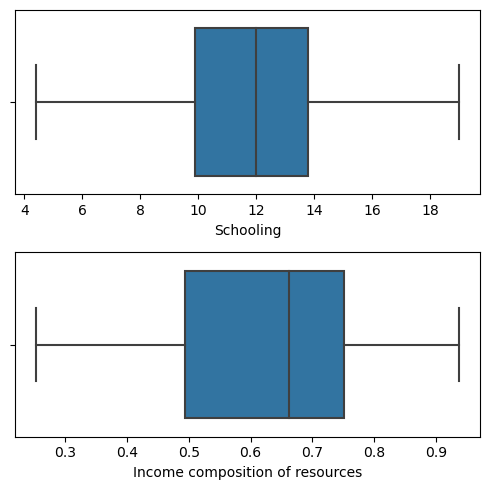

In [70]:
# Create a boxplot for Schooling and Life Expectancy

fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(filtered_data['Schooling'], ax = axs[0])
plt2 = sns.boxplot(filtered_data['Income composition of resources'], ax = axs[1])
plt.tight_layout()

The outliers are now removed and the rows with NaN values can be removed

In [71]:
# count NaN values in each column
print(filtered_data.isna().sum())

Life expectancy                    41
Schooling                          50
Income composition of resources    91
dtype: int64


In [72]:
# Remove all rows with NaN values
final_df = filtered_data.dropna()

# Output the resulting DataFrame
print(final_df)

      Life expectancy  Schooling  Income composition of resources
0                65.0       10.1                            0.479
1                59.9       10.0                            0.476
2                59.9        9.9                            0.470
3                59.5        9.8                            0.463
4                59.2        9.5                            0.454
...               ...        ...                              ...
2116             54.9       10.1                            0.452
2117             52.4       10.0                            0.436
2118             50.0        9.9                            0.419
2119             48.2        9.7                            0.421
2120             46.6        9.6                            0.414

[1964 rows x 3 columns]


In [73]:
# Define x and y
x = final_df[['Schooling', 'Income composition of resources']]
y = final_df['Life expectancy']

# Add constant to x
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     3447.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:10:50   Log-Likelihood:                -5620.4
No. Observations:                1964   AIC:                         1.125e+04
Df Residuals:                    1961   BIC:                         1.126e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

The R-squared value of 0.779 indicates that the model explains 77.9% of the variance in life expectancy, which is a good fit. The F-statistic value of 3441 and the corresponding p-value of 0.00 indicate that the overall model is significant.

The coefficients indicate that, holding other factors constant, for every one unit increase in schooling, life expectancy decreases by 0.91 years. On the other hand, for every one unit increase in income composition of resources, life expectancy increases by 66.08 years.

The standard errors, t-values, and p-values for each coefficient give information about how statistically significant each variable is in predicting life expectancy. Both schooling and income composition of resources have p-values of 0.00, indicating that they are statistically significant predictors of life expectancy.

Overall, the model suggests that both schooling and income composition of resources are significant predictors of life expectancy, and together they can explain almost 78% of the variance in life expectancy. However, the residuals are not normally distributed, suggesting that there may be other factors that are not accounted for in the model.